In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
data = pd.read_csv(r'AirPassengers.csv')
data.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [3]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [4]:
data.shape

(144, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Text(0.5, 1.0, 'Number of Passengers accoring to Months')

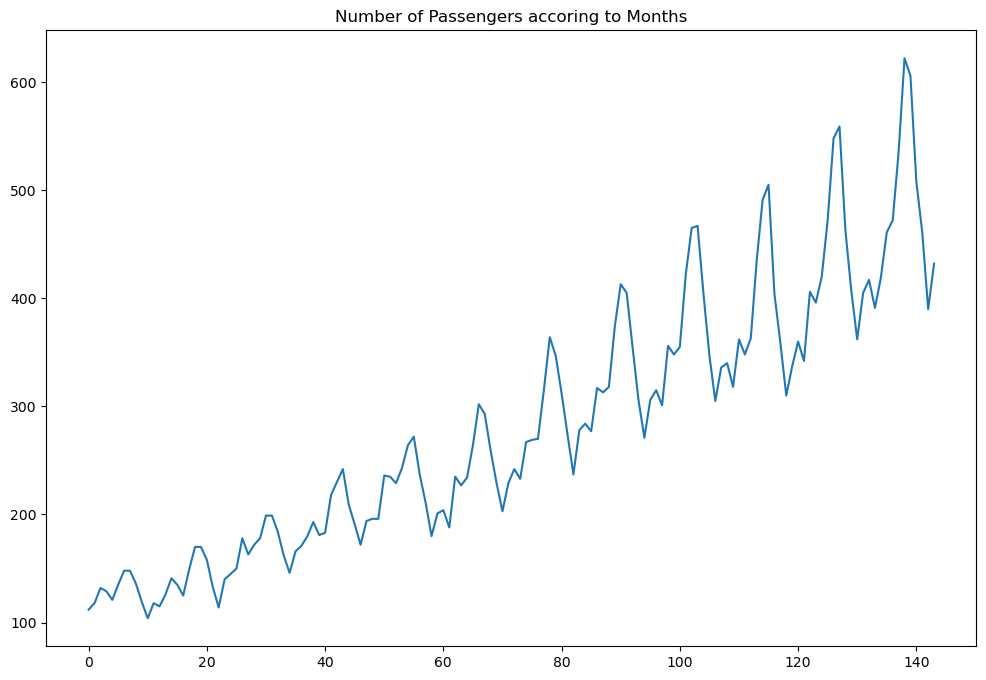

In [6]:
plt.figure(figsize=(12,8))
plt.plot(data["#Passengers"])
plt.title("Number of Passengers accoring to Months")

In [7]:
dataset = data.drop(columns="Month")

In [8]:
dataset = dataset.astype('float32')

In [9]:
#define function to split sequecne
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        #find the end of this pattern
        end_ix = i + n_steps
        #check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        #gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [11]:
train_size = int(len(dataset) * 0.67)
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [12]:
n_steps = 12
X_train, y_train = split_sequence(train, n_steps)
X_test, y_test = split_sequence(test, n_steps)

In [13]:
X_train[:3]

array([[[0.01544401],
        [0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984557],
        [0.08494207],
        [0.08494207],
        [0.06177607],
        [0.02895753],
        [0.        ],
        [0.02702703]],

       [[0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984557],
        [0.08494207],
        [0.08494207],
        [0.06177607],
        [0.02895753],
        [0.        ],
        [0.02702703],
        [0.02123553]],

       [[0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984557],
        [0.08494207],
        [0.08494207],
        [0.06177607],
        [0.02895753],
        [0.        ],
        [0.02702703],
        [0.02123553],
        [0.04247104]]], dtype=float32)

In [14]:
y_train[:3]

array([[0.02123553],
       [0.04247104],
       [0.07142857]], dtype=float32)

In [15]:
n_features = 1
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

In [37]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 12, 50)            10400     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 64)                3264      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 35977 (140.54 KB)
Trainable params: 35977 (140.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
3/3 [==============================] - 4s 24ms/step - loss: 0.0713
Epoch 2/200
3/3 [==============================] - 0s 16ms/step - loss: 0.0580
Epoch 3/200
3/3 [==============================] - 0s 17ms/step - loss: 0.0453
Epoch 4/200
3/3 [==============================] - 0s 18ms/step - loss: 0.0328
Epoch 5/200
3/3 [==============================] - 0s 26ms/step - loss: 0.0210
Epoch 6/200
3/3 [==============================] - 0s 22ms/step - loss: 0.0108
Epoch 7/200
3/3 [==============================] - 0s 15ms/step - loss: 0.0094
Epoch 8/200
3/3 [==============================] - 0s 17ms/step - loss: 0.0123
Epoch 9/200
3/3 [==============================] - 0s 16ms/step - loss: 0.0108
Epoch 10/200
3/3 [==============================] - 0s 18ms/step - loss: 0.0077
Epoch 11/200
3/3 [==============================] - 0s 20ms/step - loss: 0.0073
Epoch 12/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0082
Epoch 13/200
3/3 [==============================]

3/3 [==============================] - 0s 43ms/step - loss: 0.0013
Epoch 104/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0012
Epoch 105/200
3/3 [==============================] - 0s 35ms/step - loss: 0.0012
Epoch 106/200
3/3 [==============================] - 0s 25ms/step - loss: 0.0013
Epoch 107/200
3/3 [==============================] - 0s 17ms/step - loss: 0.0012
Epoch 108/200
3/3 [==============================] - 0s 15ms/step - loss: 0.0013
Epoch 109/200
3/3 [==============================] - 0s 16ms/step - loss: 0.0012
Epoch 110/200
3/3 [==============================] - 0s 15ms/step - loss: 0.0012
Epoch 111/200
3/3 [==============================] - 0s 16ms/step - loss: 0.0016
Epoch 112/200
3/3 [==============================] - 0s 14ms/step - loss: 0.0019
Epoch 113/200
3/3 [==============================] - 0s 17ms/step - loss: 0.0023
Epoch 114/200
3/3 [==============================] - 0s 16ms/step - loss: 0.0018
Epoch 115/200
3/3 [=======================

3/3 [==============================] - 0s 15ms/step - loss: 5.6931e-04


In [18]:
#make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

2/2 [==============================] - 0s 8ms/step


In [19]:
# rescale the data
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(y_train)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(y_test)

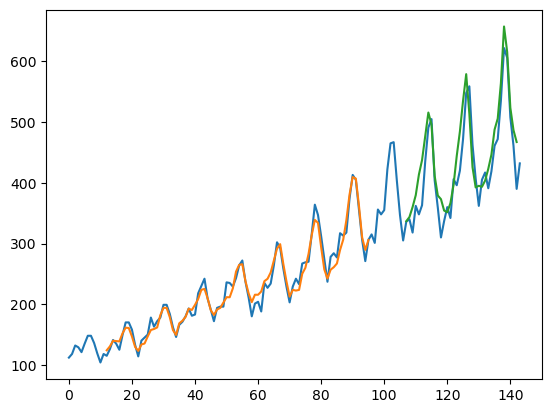

In [21]:
#shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[n_steps:len(trainPredict)+n_steps, :]=trainPredict

#shift test predictions for plotting\
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(n_steps*2)-1:len(dataset)-1, :] = testPredict
#testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1,:] = testPredict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [22]:
test.shape

(48, 1)

In [23]:
X_input = test[36:]
X_input

array([[0.6042471 ],
       [0.554054  ],
       [0.60810804],
       [0.6891892 ],
       [0.71042466],
       [0.8320464 ],
       [1.        ],
       [0.96911204],
       [0.7799227 ],
       [0.6891892 ],
       [0.55212355],
       [0.6332046 ]], dtype=float32)

In [26]:
X_input = X_input.reshape(1, -1)

In [29]:
future = model.predict(X_input)

1/1 [==============================] - 0s 470ms/step


In [30]:
scaler.inverse_transform(future)

array([[86.11518]], dtype=float32)

In [31]:
temp_input = list(X_input)
temp_input = temp_input[0].tolist()

In [39]:
lst_output=[]

i=0
while(i<n_steps):
    
    if(len(temp_input)>n_steps):
        X_input=np.array(temp_input[1:])
        print("{} month input {}".format(i,X_input))
        X_input=X_input.reshape(1,-1)
        X_input=X_input.reshape((1,n_steps,1))
        yhat=model.predict(X_input, verbose=0)
        print("{} moth output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        X_input = X_input.reshape((1, n_steps,1))
        yhat = model.predict(X_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)
    

0 month input [0.55405402 0.60810804 0.6891892  0.71042466 0.83204639 1.
 0.96911204 0.77992272 0.6891892  0.55212355 0.63320458 0.01055621]
0 moth output [[0.00930544]]
1 month input [0.60810804 0.6891892  0.71042466 0.83204639 1.         0.96911204
 0.77992272 0.6891892  0.55212355 0.63320458 0.01055621 0.00930544]
1 moth output [[0.00778592]]
2 month input [0.6891892  0.71042466 0.83204639 1.         0.96911204 0.77992272
 0.6891892  0.55212355 0.63320458 0.01055621 0.00930544 0.00778592]
2 moth output [[0.00616294]]
3 month input [0.71042466 0.83204639 1.         0.96911204 0.77992272 0.6891892
 0.55212355 0.63320458 0.01055621 0.00930544 0.00778592 0.00616294]
3 moth output [[0.00462045]]
4 month input [0.83204639 1.         0.96911204 0.77992272 0.6891892  0.55212355
 0.63320458 0.01055621 0.00930544 0.00778592 0.00616294 0.00462045]
4 moth output [[0.00338219]]
5 month input [1.         0.96911204 0.77992272 0.6891892  0.55212355 0.63320458
 0.01055621 0.00930544 0.00778592 0.00